# DISCRETIZAÇÃO DO TBP

#### IMPORTAÇÃO DAS BIBLIOTECAS

In [14]:
import numpy as np
from Classes.Discretizacao import Discretizacao as disc
from Classes.Planeta import Planeta
from Classes.Splines import CubicSpline
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import plotly.graph_objects as go
from plotly.subplots import make_subplots  
from IPython.display import HTML
import polars as pl
import subprocess
import os
%matplotlib inline


#### CONDIÇÕES INICIAIS E LOOP DA DISCRETIZAÇÃO PARA MÚLTIPLOS "N"

In [3]:

#massa padrao de todos os planetas
labels = ['Corpo 1', 'Corpo 2', 'Corpo 3']
T = 1
discretizacao = disc()
np.set_printoptions(threshold=np.inf)
dfs = [] #LISTA COM TODAS OS DATAFRAMES
schema = ['t', 'pos1x', 'pos2x', 'pos3x', 'pos1y', 'pos2y', 'pos3y']
dados = np.zeros((1, 8)) #UTILIZADO PARA GERAR TABELA DE CONVERGÊNCIA
for i in range(4, 10):  # Adjust the range to iterate up to n+1
    n = 2**i
    h = T/n
    pos1, pos2, pos3, v1, v2, v3, t = discretizacao.converte(n, True)
    #pos1, pos2, pos3, v1, v2, v3, t = discretizacao.converte(n, True)
    t = np.squeeze(t)
    y = np.hstack((pos1[-1], pos2[-1], pos3[-1]))
    dado_novo = np.hstack((n, h, y))
    dados = np.vstack((dados, dado_novo))
    #GERANDO UMA LISTA COM TODOS OS DATAFRAMES (TABELAS) PARA CADA N
    df = pl.from_numpy(np.hstack([t.reshape(-1,1), pos1, pos2, pos3]), schema = schema)
    dfs.append(df)
    
    
    
    
    

### TABELAS

##### DADOS OBTIDOS

In [4]:
cols = ['pos1x', 'pos2x', 'pos3x', 'pos1y', 'pos2y', 'pos3y']
df = pl.from_numpy(dados[1:], schema = ['n', 'h'] + cols)
df

n,h,pos1x,pos2x,pos3x,pos1y,pos2y,pos3y
f64,f64,f64,f64,f64,f64,f64,f64
16.0,0.0625,-7.987408,-3.422581,15.988045,6.118097,-8.000637,-2.695516
32.0,0.03125,0.782738,-0.340489,0.22709,0.189857,-1.009828,0.150632
64.0,0.015625,0.645867,-0.358155,0.430204,0.310826,-1.076071,0.04733
128.0,0.0078125,0.640021,-0.357724,0.437862,0.314287,-1.077882,0.043437
256.0,0.003906,0.639793,-0.357696,0.438157,0.314418,-1.077951,0.043278
512.0,0.001953,0.639784,-0.357694,0.43817,0.314423,-1.077954,0.04327


##### TABELA DE CONVERGÊNCIA

In [5]:
cols = ['pos1x', 'pos2x', 'pos3x', 'pos1y', 'pos2y', 'pos3y']
erros = np.log2(np.absolute((df[cols][0:-2] - df[cols][1:-1])/ 
        (df[cols][1:-1] - df[cols][2:])))
pl.from_numpy(erros)

column_0,column_1,column_2,column_3,column_4,column_5
f64,f64,f64,f64,f64,f64
6.001703,7.446808,6.277921,5.6149,6.721566,4.784061
4.54923,5.357163,4.729203,5.127186,5.192207,4.730127
4.686278,3.914383,4.696793,4.723144,4.731253,4.607796
4.57254,4.050726,4.579218,4.590866,4.601672,4.47808


#### ANIMAÇÃO DOS 3 CORPOS (no Jupyter Notebook não funciona, precisa rodar o main.py)

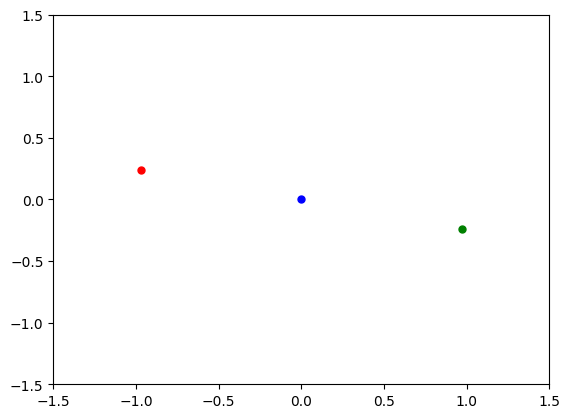

In [5]:
fig, ax = plt.subplots()

ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)

# Create empty lines for the plot
line1, = ax.plot([], [], 'r-', lw=2)
line2, = ax.plot([], [], 'g-', lw=2)
line3, = ax.plot([], [], 'b-', lw=2)

# Create empty scatter plots for the balls
ball1, = ax.plot([], [], 'ro', markersize=5)
ball2, = ax.plot([], [], 'go', markersize=5)
ball3, = ax.plot([], [], 'bo', markersize=5)

# Animation function
def update(frame):
    line1.set_data(pos1[:frame, 0], pos1[:frame, 1])
    line2.set_data(pos2[:frame, 0], pos2[:frame, 1])
    line3.set_data(pos3[:frame, 0], pos3[:frame, 1])

# Create empty scatter plots for the balls
ball1, = ax.plot([], [], 'ro', markersize=5)
ball2, = ax.plot([], [], 'go', markersize=5)
ball3, = ax.plot([], [], 'bo', markersize=5)

# Animation function
def update(frame):
    line1.set_data(pos1[:frame, 0], pos1[:frame, 1])
    line2.set_data(pos2[:frame, 0], pos2[:frame, 1])
    line3.set_data(pos3[:frame, 0], pos3[:frame, 1])
    ball1.set_data([pos1[frame, 0]], [pos1[frame, 1]])
    ball2.set_data([pos2[frame, 0]], [pos2[frame, 1]])
    ball3.set_data([pos3[frame, 0]], [pos3[frame, 1]])

    return line1, line2, line3, ball1, ball2, ball3

# Create the animation
ani = FuncAnimation(fig, update, frames=len(pos1), interval=1, blit=True)
plt.show()


### GERAÇÃO DE MÚLTIPLOS GRÁFICOS

##### GERANDO UM GRÁFICO PARA CADA VARIÁVEL

In [4]:
markers = ['circle-open', 'triangle-left-open', 'cross-open', 'square-open', 'asterisk-open', 'star-open']
for i in range(len(schema[1:])):
    fig = go.Figure()
    var = schema[i+1]
    for n in range(len(dfs)):
            marker = [markers[n % len(markers)]]  # Fix: Use modulo operator to cycle through the markers list
            fig.add_trace(go.Scatter(x=dfs[n]['t'][::2**n], y=dfs[n][var][::2**n], mode="markers",
                                    marker_symbol=len(dfs[n]['t'][::2**n]) * marker, name="<b>" + "n = " + str(2 ** (n + 4)) + '</b>',
                                    marker_color = "black", marker_line_width = 0.7, marker_size = 10))

    fig.update_layout(title="<b> Corpo {0} ({1}) vs t </b>".format(1 + i // 2, "x" if i % 2 == 0 else "y"),
                      xaxis_title='<b>t</b>', yaxis_title="<b>" + "x" if i % 2 == 0 else "y" + "</b>", width=700)
    fig.show()

    # Save the figure as PNG
    fig.write_image("ImagensPlotly/Corpo{0}{1}.png".format(1 + i // 2, "x" if i % 2 == 0 else "y"))
    
    

        

### GERAÇÃO DE TABELAS DE CONVERGÊNCIA

In [16]:
for col in cols:
    dados = df[col]
    ordem_p = np.log2(np.absolute((dados[0:-2] - dados[1:-1])/(dados[1:-1] - dados[2:])))
    aux_df = pl.DataFrame({'h': df['h'][1:-1], f"{col}(2h)": dados[0:-2],
                           "{col}(h)": dados[1:-1], "{col}(h/2)": dados[2:], 'ordem': ordem_p}).with_columns(pl.all().round(5))
    aux_df = aux_df.select(pl.all().map_elements(lambda x: "{:.4e}".format(x)))
    file_in = f"Tabelas/convergencia_{col}.csv"
    file_out = f"Tabelas/convergencia_{col}.tex"
    aux_df.write_csv(file_in)
    os.system(f"python tably.py {file_in} > {file_out}")

### SPLINE CÚBICO PARA 1 CORPO

In [36]:
np.array([[pos1, v1], [pos2, v2], [pos3, v3]])[0][1][0,0]

0.466203685

In [17]:

#SPLINE CUBICO
body_stack = np.array([[pos1, v1], [pos2, v2], [pos3, v3]])#
#body_stack = np.array([pos1, pos2, pos3])

t = np.linspace(0, T, len(pos1[:,0]))
t_plot = np.arange(0, T,  T/(50*len(t)))
csx = np.array(list(map( lambda pos: CubicSpline(t, pos[0,:, 0], pos[1, 0, 0], pos[1,-1, 0], bc_type = 'clamped' ), body_stack)))
csy = np.array(list(map( lambda pos: CubicSpline(t, pos[0,:, 1], pos[1, 0, 0], pos[1,-1, 1], bc_type = 'clamped'), body_stack)))

# Create figure
fig = go.Figure()

# Add real values
fig.add_trace(go.Scatter(x=pos1[:, 0], y=pos1[:, 1], mode='lines',
                         line= { 'color': 'black'}, name='Runge Kutta'))
# fig.add_trace(go.Scatter(x=pos2[:, 0], y=pos2[:, 1], mode='lines', name='Real Pos2'))
# fig.add_trace(go.Scatter(x=pos3[:, 0], y=pos3[:, 1], mode='lines', name='Real Pos3'))

# # Add spline predictions
# for i in range(len(pos_stack)):
#     fig.add_trace(go.Scatter(x=csx[i](t_plot), y=csy[i](t_plot), mode='lines', name=f'Spline Pos{i+1}'))
fig.add_trace(go.Scatter(x=csx[0](t_plot)[0:], y=csy[0](t_plot)[0:], mode='lines',
                         line = { 'color': 'red'}, name=f'Spline Cúbico'))

# Set layout
fig.update_layout(
    title='<b>Movimento dos três corpos</b>',
    xaxis_title='<b>X (m)</b>',
    yaxis_title='<b>Y (m)</b>',
    legend_title='<b>Legenda</b>',
    showlegend=True,
    width = 600
)

fig.show()




In [4]:
csx[0]